#**Modern Statistics**
###**Final Project - Supervised learning**
#### David Guedalia, Hamza Abuleil
🕊
🏩
😊

#Import

In [498]:
import pandas as pd
import numpy as np
import re
import string
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression, Ridge, LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
import matplotlib.pyplot as plt

In [499]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Load dataset

In [500]:
train_titanic = pd.read_csv('/content/drive/MyDrive/titanic/train.csv')
test_titanic = pd.read_csv('/content/drive/MyDrive/titanic/test.csv')
y_test = pd.read_csv('/content/drive/MyDrive/titanic/submission_file.csv')

In [501]:
train_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [502]:
test_titanic

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


#Label - y

In [503]:
y_train = train_titanic['Survived']

In [504]:
# missing values:
print("Number of missing values: ", y_train.isnull().sum())

Number of missing values:  0


#Descriptive Train and Test dataset

In [505]:
train_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [506]:
test_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [507]:
for column in train_titanic.columns:
    print(column, len(train_titanic[column].unique()))

PassengerId 891
Survived 2
Pclass 3
Name 891
Sex 2
Age 89
SibSp 7
Parch 7
Ticket 681
Fare 248
Cabin 148
Embarked 4


#Missing Values

##PassengerId

In [508]:
test_passengerid = test_titanic['PassengerId']
train_titanic = train_titanic.drop('PassengerId', axis=1)
test_titanic = test_titanic.drop('PassengerId', axis=1)

##Name

In [509]:
print("Number of missing values train - Name: ", train_titanic['Name'].isnull().sum())
print("Number of missing values test - Name: ", test_titanic['Name'].isnull().sum())

Number of missing values train - Name:  0
Number of missing values test - Name:  0


We decided to take the title of the name as a featrue as it can have correlation with survive

In [510]:
title_names= set(["Mr", "Mrs", "Miss", "Master", "Dr"])
def create_title(name):
    list_name = map(lambda x: re.sub(r'[^a-zA-Z]', '', x), name.split(" "))
    title = set(list_name).intersection(title_names)
    if len(title) == 1:
        return title.pop()
    else: 
        return 'OTHER_TITLE'

In [511]:
train_titanic["Title_Name"] = train_titanic["Name"].apply(create_title)
test_titanic["Title_Name"] = test_titanic["Name"].apply(create_title)

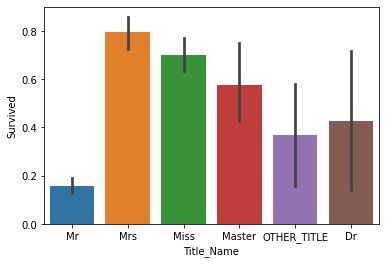

In [512]:
sns.barplot(x = 'Title_Name', y = 'Survived', data = train_titanic)

In [513]:
train_titanic = train_titanic.drop('Name', axis=1)
test_titanic = test_titanic.drop('Name', axis=1)

##Age

In [514]:
print("Number of missing values train - Age: ", train_titanic['Age'].isnull().sum())
print("Number of missing values test - Age: ", test_titanic['Age'].isnull().sum())

Number of missing values train - Age:  177
Number of missing values test - Age:  86


We decide to fill the nan values of ages with the mean of the age.


In [515]:
train_titanic['Age'] = train_titanic['Age'].fillna(train_titanic['Age'].mean())
test_titanic['Age'] = test_titanic['Age'].fillna(test_titanic['Age'].mean())

In [516]:
train_titanic.Age.isnull().value_counts()

False    891
Name: Age, dtype: int64

##Fare

In [517]:
print("Number of missing values train - Fare: ", train_titanic['Fare'].isnull().sum())
print("Number of missing values test - Fare: ",test_titanic['Fare'].isnull().sum())

Number of missing values train - Fare:  0
Number of missing values test - Fare:  1


We decide to fill the nan values of fare with the mean of the fare.


In [518]:
test_titanic['Fare'] = test_titanic['Fare'].fillna(test_titanic['Fare'].median())

##Embarked

In [519]:
print("Number of missing values train - Embarked: ", train_titanic['Embarked'].isnull().sum())
print("Number of missing values test - Embarked: ", test_titanic['Embarked'].isnull().sum())

Number of missing values train - Embarked:  2
Number of missing values test - Embarked:  0


In [520]:
train_titanic['Embarked'] = train_titanic['Embarked'].fillna("S") 

##Ticket

In [521]:
train_titanic['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [522]:
train_titanic['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [523]:
def create_types(ticket):
    ticket = re.sub(r'[^a-zA-Z]', '', ticket)
    if ticket != "":
        return ticket
    else: 
        return 'OTHER_TICKET'

In [524]:
train_titanic['Ticket'] = train_titanic['Ticket'].apply(create_types)
test_titanic['Ticket'] = test_titanic['Ticket'].apply(create_types)

In [525]:
train_dict_up_5 = dict(train_titanic['Ticket'].value_counts()[:8])
test_dict_up_5 = dict(test_titanic['Ticket'].value_counts()[:8])
train_titanic['Ticket'] = train_titanic['Ticket'].apply(lambda x:  "OTHER_TICKET" if x not in train_dict_up_5 else x)
test_titanic['Ticket'] = test_titanic['Ticket'].apply(lambda x:  "OTHER_TICKET" if x not in test_dict_up_5 else x)

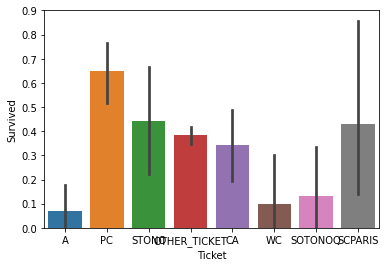

In [526]:
sns.barplot(x = 'Ticket', y = 'Survived', data = train_titanic)

According the variance and the amount we decided to join together STONO and SOTONOQ and replace SCPARIS with Other

In [527]:
train_titanic['Ticket'] = train_titanic['Ticket'].apply(lambda x:  "OTHER_TICKET" if x == "SCPARIS" else x)
test_titanic['Ticket'] = test_titanic['Ticket'].apply(lambda x:  "OTHER_TICKET" if x == "SCPARIS" else x)
train_titanic['Ticket'] = train_titanic['Ticket'].apply(lambda x:  "SOTONOQ" if x == "STONO" else x)
test_titanic['Ticket'] = test_titanic['Ticket'].apply(lambda x:  "OTHER_TICKET" if x == "SOPP" else x)

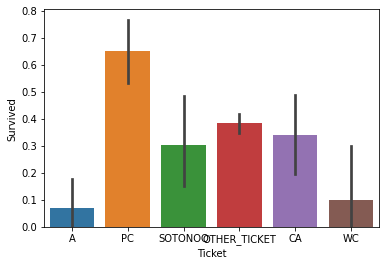

In [528]:
sns.barplot(x = 'Ticket', y = 'Survived', data = train_titanic)

In [529]:
train_titanic['Ticket'].value_counts()

OTHER_TICKET    719
PC               60
CA               41
SOTONOQ          33
A                28
WC               10
Name: Ticket, dtype: int64

In [530]:
test_titanic['Ticket'].value_counts()

OTHER_TICKET    334
PC               32
CA               27
A                11
SOTONOQ           9
WC                5
Name: Ticket, dtype: int64

##Cabin

In [531]:
print("Number of missing values train - Cabin: ", train_titanic['Cabin'].isnull().sum())
print("Number of missing values test - Cabin: ", test_titanic['Cabin'].isnull().sum())

Number of missing values train - Cabin:  687
Number of missing values test - Cabin:  327


In [532]:
train_titanic['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [533]:
test_titanic['Cabin'].unique()

array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105'], dtype=object)

In [534]:
train_titanic['Cabin'] = train_titanic['Cabin'].apply(lambda x:  "OTHER_CABIN" if x is np.nan else x)
test_titanic['Cabin'] = test_titanic['Cabin'].apply(lambda x:  "OTHER_CABIN" if x is np.nan else x)

In [535]:
train_titanic['Cabin'].unique()

array(['OTHER_CABIN', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       

In [536]:
def create_cabin(cabin):
    cabin = re.sub(r'[^a-zA-Z]', '', cabin)
    if cabin != "":
        return cabin
    else: 
        return 'OTHERCABIN'

In [537]:
train_titanic['Cabin'] = train_titanic['Cabin'].apply(create_cabin)
test_titanic['Cabin'] = test_titanic['Cabin'].apply(create_cabin)

In [538]:
train_titanic['Cabin'].value_counts()[:7]

OTHERCABIN    687
C              51
B              36
E              32
D              32
A              15
F               9
Name: Cabin, dtype: int64

In [539]:
train_dict_up_5_cabin = dict(train_titanic['Cabin'].value_counts()[:7])
test_dict_up_5_cabin = dict(test_titanic['Cabin'].value_counts()[:7])
train_titanic['Cabin'] = train_titanic['Cabin'].apply(lambda x:  "OTHERCABIN" if x not in train_dict_up_5_cabin else x)
test_titanic['Cabin'] = test_titanic['Cabin'].apply(lambda x:  "OTHERCABIN" if x not in test_dict_up_5_cabin else x)

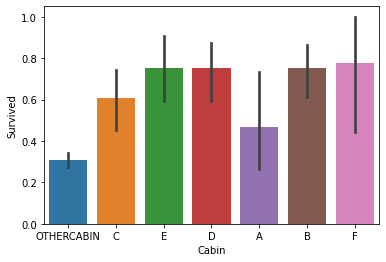

In [540]:
sns.barplot(x = 'Cabin', y = 'Survived', data = train_titanic)

In [541]:
test_titanic['Cabin'].value_counts()[:7]

OTHERCABIN    345
C              29
B              12
D              12
E               8
A               7
F               5
Name: Cabin, dtype: int64

#Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


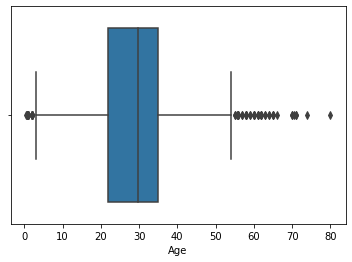

In [542]:
sns.boxplot(train_titanic.Age)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


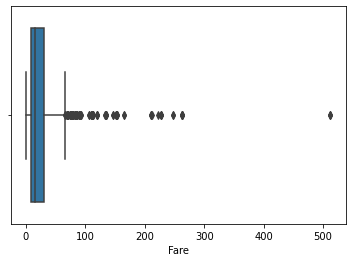

In [543]:
sns.boxplot(train_titanic.Fare)

In [544]:
q3 = train_titanic['Fare'].quantile(0.75)
q1 = train_titanic['Fare'].quantile(0.25)
iqr = q3 - q1
upper_bound = q3 + 4 * iqr
train_titanic.loc[train_titanic.Fare > upper_bound, 'Fare'] = q3 +  4 * iqr 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


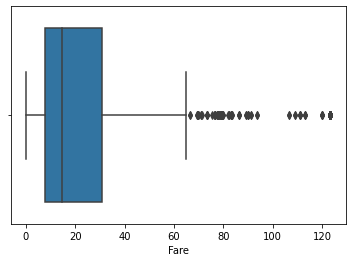

In [545]:
sns.boxplot(train_titanic.Fare)

In [546]:
train_titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Name
0,0,3,male,22.000000,1,0,A,7.2500,OTHERCABIN,S,Mr
1,1,1,female,38.000000,1,0,PC,71.2833,C,C,Mrs
2,1,3,female,26.000000,0,0,SOTONOQ,7.9250,OTHERCABIN,S,Miss
3,1,1,female,35.000000,1,0,OTHER_TICKET,53.1000,C,S,Mrs
4,0,3,male,35.000000,0,0,OTHER_TICKET,8.0500,OTHERCABIN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,OTHER_TICKET,13.0000,OTHERCABIN,S,OTHER_TITLE
887,1,1,female,19.000000,0,0,OTHER_TICKET,30.0000,B,S,Miss
888,0,3,female,29.699118,1,2,WC,23.4500,OTHERCABIN,S,Miss
889,1,1,male,26.000000,0,0,OTHER_TICKET,30.0000,C,C,Mr


#Rare values

In [547]:
train_titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Name
0,0,3,male,22.000000,1,0,A,7.2500,OTHERCABIN,S,Mr
1,1,1,female,38.000000,1,0,PC,71.2833,C,C,Mrs
2,1,3,female,26.000000,0,0,SOTONOQ,7.9250,OTHERCABIN,S,Miss
3,1,1,female,35.000000,1,0,OTHER_TICKET,53.1000,C,S,Mrs
4,0,3,male,35.000000,0,0,OTHER_TICKET,8.0500,OTHERCABIN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,OTHER_TICKET,13.0000,OTHERCABIN,S,OTHER_TITLE
887,1,1,female,19.000000,0,0,OTHER_TICKET,30.0000,B,S,Miss
888,0,3,female,29.699118,1,2,WC,23.4500,OTHERCABIN,S,Miss
889,1,1,male,26.000000,0,0,OTHER_TICKET,30.0000,C,C,Mr


In [548]:
print(train_titanic['Sex'].unique())
print(test_titanic['Sex'].unique())

['male' 'female']
['male' 'female']


In [549]:
print(train_titanic["Sex"].value_counts()/len(train_titanic))
print(test_titanic["Sex"].value_counts()/len(test_titanic))

male      0.647587
female    0.352413
Name: Sex, dtype: float64
male      0.636364
female    0.363636
Name: Sex, dtype: float64


In [550]:
print(train_titanic['Pclass'].unique())
print(test_titanic['Pclass'].unique())

[3 1 2]
[3 2 1]


In [551]:
print(train_titanic["Pclass"].value_counts()/len(train_titanic))
print(test_titanic["Pclass"].value_counts()/len(test_titanic))

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64
3    0.521531
1    0.255981
2    0.222488
Name: Pclass, dtype: float64


In [552]:
print(train_titanic['SibSp'].unique())
print(test_titanic['SibSp'].unique())

[1 0 3 4 2 5 8]
[0 1 2 3 4 5 8]


In [553]:
print(train_titanic['Parch'].unique())
print(test_titanic['Parch'].unique())

[0 1 2 5 3 4 6]
[0 1 3 2 4 6 5 9]


In [554]:
print(train_titanic["Parch"].value_counts()/len(train_titanic))
print(test_titanic["Parch"].value_counts()/len(test_titanic))

0    0.760943
1    0.132435
2    0.089787
5    0.005612
3    0.005612
4    0.004489
6    0.001122
Name: Parch, dtype: float64
0    0.775120
1    0.124402
2    0.078947
3    0.007177
4    0.004785
9    0.004785
6    0.002392
5    0.002392
Name: Parch, dtype: float64


#Encoding Categorial Values

In [555]:
train_titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Name
0,0,3,male,22.000000,1,0,A,7.2500,OTHERCABIN,S,Mr
1,1,1,female,38.000000,1,0,PC,71.2833,C,C,Mrs
2,1,3,female,26.000000,0,0,SOTONOQ,7.9250,OTHERCABIN,S,Miss
3,1,1,female,35.000000,1,0,OTHER_TICKET,53.1000,C,S,Mrs
4,0,3,male,35.000000,0,0,OTHER_TICKET,8.0500,OTHERCABIN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,OTHER_TICKET,13.0000,OTHERCABIN,S,OTHER_TITLE
887,1,1,female,19.000000,0,0,OTHER_TICKET,30.0000,B,S,Miss
888,0,3,female,29.699118,1,2,WC,23.4500,OTHERCABIN,S,Miss
889,1,1,male,26.000000,0,0,OTHER_TICKET,30.0000,C,C,Mr


In [556]:
columns = ['Cabin', 'Title_Name',  'Sex', 'Embarked', 'Ticket', 'Pclass']
le = LabelEncoder()
train_titanic_le = train_titanic[:]
test_titanic_le = test_titanic[:]
for col in columns:
    label = le.fit_transform(train_titanic_le[col])
    train_titanic_le.drop(col, axis=1, inplace=True)
    train_titanic_le[col] = label
    label = le.fit_transform(test_titanic_le[col])
    test_titanic_le.drop(col, axis=1, inplace=True)
    test_titanic_le[col] = label

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


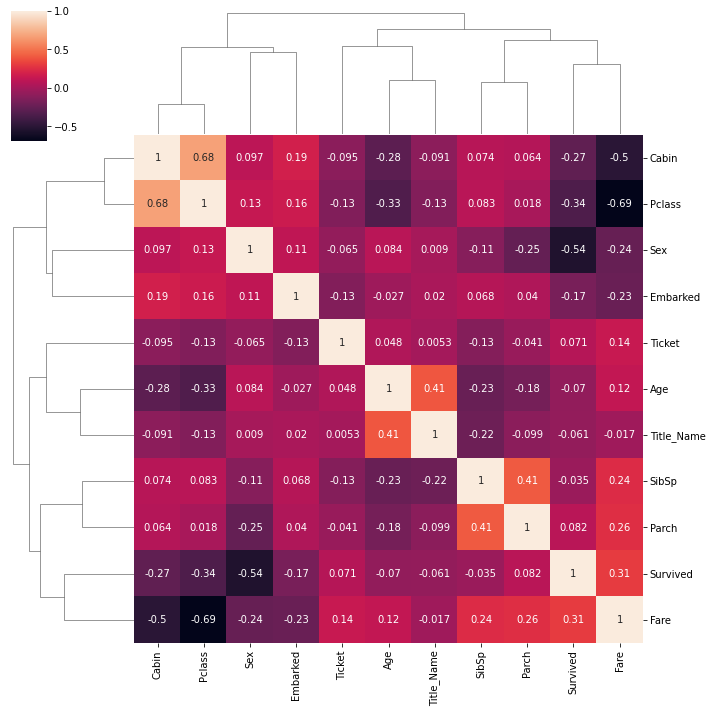

In [557]:
sns.clustermap(train_titanic_le.corr(),vmax=1.0,annot=True)

In [558]:
for col in columns:
    train_titanic = pd.concat([train_titanic, pd.get_dummies(train_titanic[col], drop_first = True)], axis =1)
    test_titanic = pd.concat([test_titanic, pd.get_dummies(test_titanic[col], drop_first = True)], axis =1)
train_titanic = train_titanic.drop(columns, axis=1)
test_titanic = test_titanic.drop(columns, axis=1)

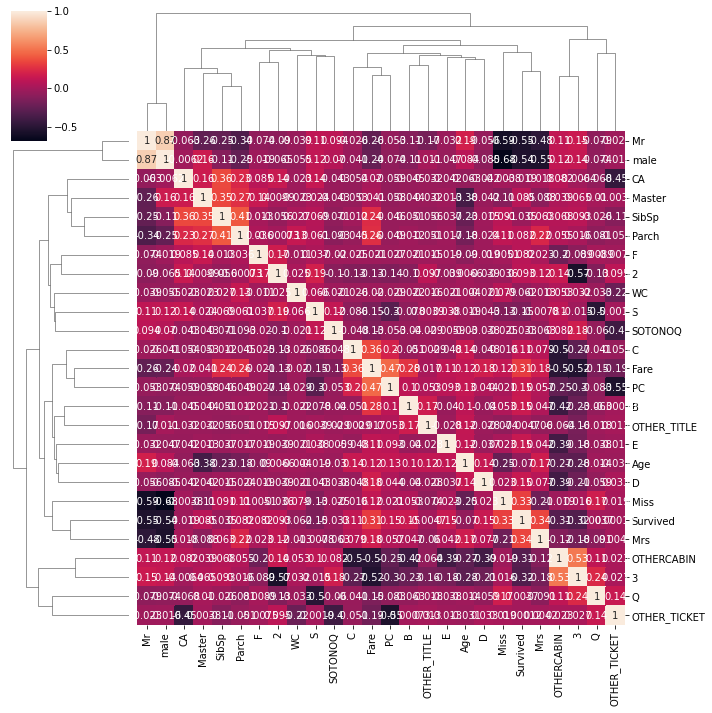

In [559]:
sns.clustermap(train_titanic.corr(),vmax=1.0,annot=True)

#Prediction

In [560]:
train_titanic = train_titanic.drop('Survived', axis=1)
train_titanic_le = train_titanic_le.drop('Survived', axis=1)

Cross validation of the algorithems

Looking for the best algorithem for logistic regression

In [561]:
kf =KFold(n_splits=5, shuffle=True, random_state=42)
algorithms = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga', 'l1', 'l2']
for algo in algorithms:
    score = cross_val_score(LogisticRegression(max_iter= 4000, solver= algo, random_state= 42), train_titanic, y_train, cv= kf, scoring="accuracy")
    print(f'Average score({algo}): {"{:.3f}".format(score.mean())}')
    

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

Average score(newton-cg): 0.820


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

Average score(lbfgs): 0.820
Average score(liblinear): 0.817


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

Average score(sag): 0.816


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

Average score(saga): 0.817
Average score(l1): nan
Average score(l2): nan


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py",

The best algorithem is lbfgs.

In [562]:
logistic_regression = LogisticRegression(solver='lbfgs', max_iter=4000,random_state= 42)
penalty = ['l1', 'l2']
C = np.logspace(-2, 2, 100)
kfold = StratifiedKFold(n_splits=10)
lr_param_grid = {'C': C}
clf = GridSearchCV(LogisticRegression(), lr_param_grid)
gsLR = GridSearchCV(logistic_regression, param_grid = lr_param_grid, cv=kfold, scoring="accuracy", n_jobs = 4, verbose = 1)
gsLR.fit(train_titanic, y_train)
LR_best = gsLR.best_estimator_
print("Best parameter C:", LR_best.get_params()['C'])
print("Best penalty:", LR_best.get_params()['penalty'])

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Best parameter C: 3.5111917342151346
Best penalty: l2


In [563]:
logistic_model = LogisticRegression(max_iter=4000, C=3.5, penalty='l2', solver='lbfgs')
logistic_model.fit(train_titanic,y_train)
pred = logistic_model.predict(test_titanic)
submission = pd.DataFrame({'PassengerId' : test_passengerid,'Survived' : pred})
accuracy_score(y_test["Survived"],submission["Survived"])*100

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


91.14832535885168

In [564]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [565]:
submission.to_csv("submission.csv", index=False)

The Score of Kaggle: 0.76315

On gradient boosting we got better performances on the le encoder.

In [566]:
gradient_boosting_2 = GradientBoostingClassifier(max_depth=2)
gradient_boosting_2.fit(train_titanic_le,y_train)
pred_boosting = gradient_boosting_2.predict(test_titanic_le)
submission_boosting_2 = pd.DataFrame({'PassengerId' : test_passengerid,'Survived' : pred_boosting})
accuracy_score(y_test["Survived"],submission_boosting_2["Survived"])*100

91.6267942583732

In [567]:
gradient_boosting_3 = GradientBoostingClassifier(max_depth=3)
gradient_boosting_3.fit(train_titanic_le,y_train)
pred_boosting = gradient_boosting_3.predict(test_titanic_le)
submission_boosting_3 = pd.DataFrame({'PassengerId' : test_passengerid,'Survived' : pred_boosting})
accuracy_score(y_test["Survived"],submission_boosting_3["Survived"])*100

84.92822966507177

In [568]:
gradient_boosting_4 = GradientBoostingClassifier(max_depth=4)
gradient_boosting_4.fit(train_titanic_le,y_train)
pred_boosting = gradient_boosting_4.predict(test_titanic_le)
submission_boosting_4 = pd.DataFrame({'PassengerId' : test_passengerid,'Survived' : pred_boosting})
accuracy_score(y_test["Survived"],submission_boosting_4["Survived"])*100

83.73205741626795

We can conclude that the best depth is 2.

In [569]:
submission_boosting_2.to_csv("submission_boosting_2.csv", index=False)

The Score of Kaggle: 0.76794

#Lasso Path

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

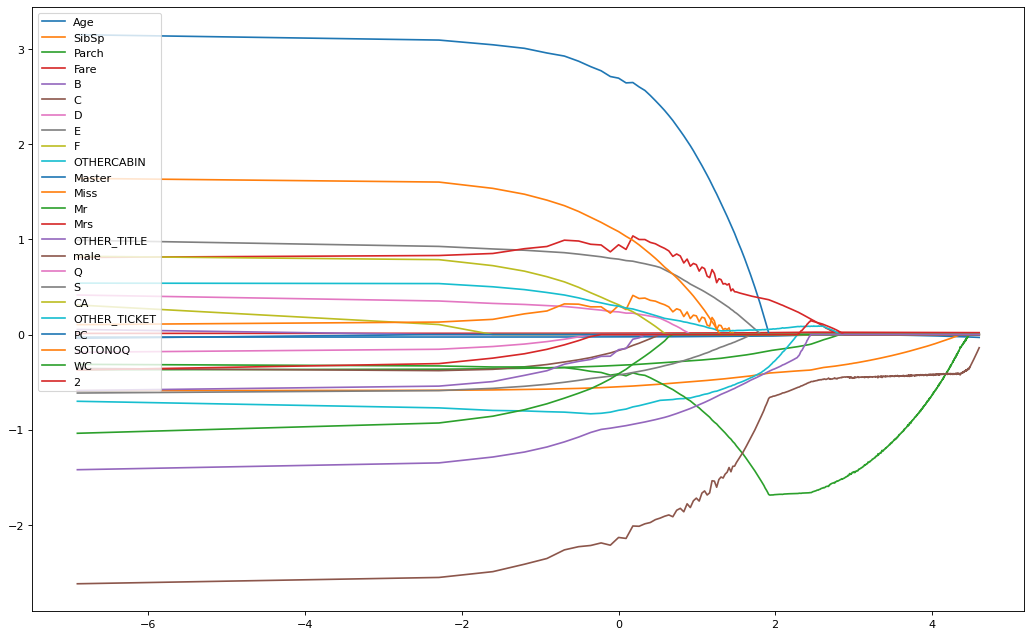

In [570]:
from matplotlib.pyplot import figure
betas = []
lambdas = np.arange(0.001,100, 0.1)
for c in lambdas:
  logistic_lasso = LogisticRegression(solver = 'liblinear',penalty='l1',max_iter=1000,C = 1/c)
  clf_lasso = logistic_lasso.fit(train_titanic, y_train)
  betas.append(clf_lasso.coef_)
betas=np.array(betas)
figure(figsize=(16, 10), dpi=80)
for i in range(betas.shape[2]):
  plt.legend()
  plt.plot(np.log(lambdas), betas[:,0,i],label=train_titanic.columns[i])

In [571]:
import math
list_to_sort = []
for i in range(betas.shape[2]):
  list_to_sort.append((sum(np.abs(betas[:,0,i]) > 0.1), train_titanic.columns[i], i))

In [572]:
sorted_by_second = sorted(list_to_sort, key=lambda tup: tup[0])

In [573]:
sorted_by_second

[(0, 'Age', 0),
 (0, 'Fare', 3),
 (0, 'B', 4),
 (0, 'PC', 20),
 (2, 'F', 8),
 (3, 'Q', 16),
 (12, 'OTHER_TITLE', 14),
 (13, 'C', 5),
 (16, 'CA', 18),
 (18, 'WC', 22),
 (21, 'D', 6),
 (28, 'OTHER_TICKET', 19),
 (33, 'Miss', 11),
 (34, 'SOTONOQ', 21),
 (35, 2, 23),
 (42, 'S', 17),
 (54, 'E', 7),
 (67, 'Master', 10),
 (90, 'OTHERCABIN', 9),
 (109, 3, 24),
 (118, 'Parch', 2),
 (134, 'Mrs', 13),
 (561, 'SibSp', 1),
 (812, 'Mr', 12),
 (1000, 'male', 15)]

We can see that the most important features are male, Mr, SibSp.

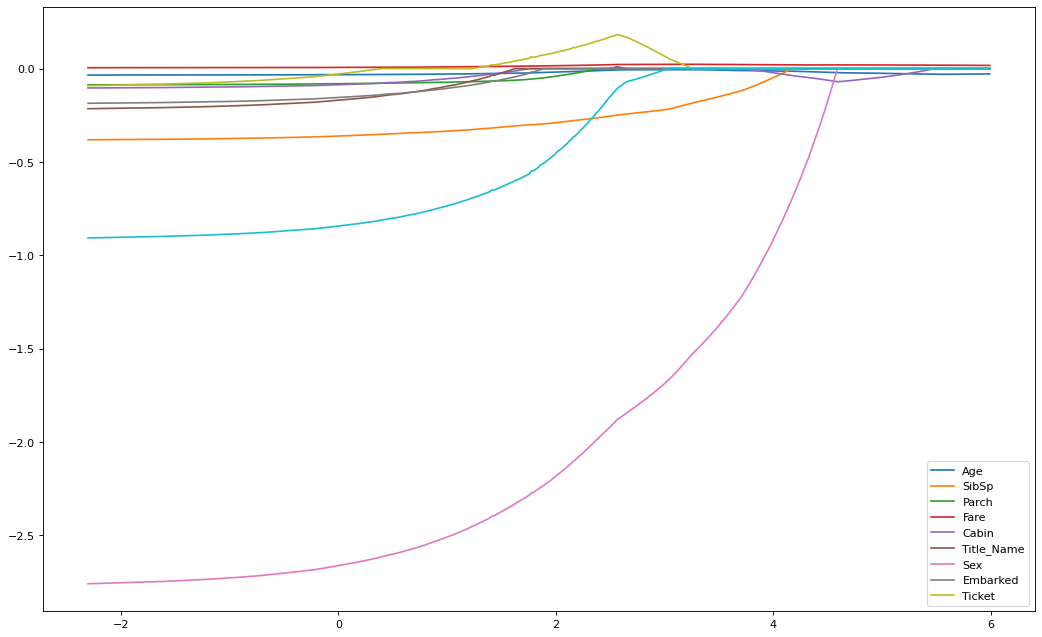

In [574]:
from matplotlib.pyplot import figure
betas = []
lambdas = np.arange(0.1,400, 0.1)
for c in lambdas:
  logistic_lasso = LogisticRegression(solver = 'liblinear',penalty='l1',max_iter=1000,C = 1/c)
  clf_lasso = logistic_lasso.fit(train_titanic_le, y_train)
  betas.append(clf_lasso.coef_)
betas=np.array(betas)
figure(figsize=(16, 10), dpi=80)
for i in range(betas.shape[2]):
  plt.legend()
  plt.plot(np.log(lambdas), betas[:,0,i],label=train_titanic_le.columns[i])

Here we can see that the most important features are Sex, SibSp

🙏
